In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
 
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [2]:
df = pd.read_csv("data.csv")

In [3]:

print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
df=df.dropna(axis=1)

In [6]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
df = df.rename(columns={'diagnosis':'Label'})

In [8]:
df['Label'].value_counts()

B    357
M    212
Name: Label, dtype: int64

In [9]:
y=df["Label"].values

In [10]:
y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
y=le.fit_transform(y)

In [13]:
y.shape

(569,)

In [14]:
X = df.drop(labels = ["Label", "id"], axis=1) 

In [15]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)


In [19]:
X_train_scaled.shape

(455, 30)

In [20]:
X_test_scaled= scaler.transform(X_test)

In [21]:
X_train_scaled.shape[1]

30

In [22]:
model = Sequential()
model.add(Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(1)) 
model.add(Activation('sigmoid'))  
model.compile(loss='binary_crossentropy',
              optimizer='adam',             
              metrics=['accuracy'])

In [23]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 6,209
Trainable params: 6,209
Non-trainabl

In [24]:
history = model.fit(X_train, y_train ,verbose=1, epochs=100, batch_size=32,
                     validation_data=(X_test, y_test))

Epoch 1/100
15/15 [==============================] - 1s 11ms/step - loss: 29.7066 - accuracy: 0.5363 - val_loss: 14.9233 - val_accuracy: 0.3772
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 24.8284 - accuracy: 0.5143 - val_loss: 0.2026 - val_accuracy: 0.9386
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 18.9768 - accuracy: 0.5648 - val_loss: 1.6959 - val_accuracy: 0.7456
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 13.8879 - accuracy: 0.6440 - val_loss: 0.4582 - val_accuracy: 0.9123
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 10.0205 - accuracy: 0.6374 - val_loss: 1.6804 - val_accuracy: 0.8947
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 9.0993 - accuracy: 0.6879 - val_loss: 0.4339 - val_accuracy: 0.9123
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 7.4552 - accuracy: 0.6835 - val_loss: 0.4475 - val_accuracy: 0.9211
Epoch 

Epoch 59/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4351 - accuracy: 0.8681 - val_loss: 0.1971 - val_accuracy: 0.9474
Epoch 60/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4926 - accuracy: 0.8659 - val_loss: 0.1992 - val_accuracy: 0.9474
Epoch 61/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3733 - accuracy: 0.8769 - val_loss: 0.2148 - val_accuracy: 0.9474
Epoch 62/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4965 - accuracy: 0.8637 - val_loss: 0.1956 - val_accuracy: 0.9561
Epoch 63/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3666 - accuracy: 0.8967 - val_loss: 0.2029 - val_accuracy: 0.9649
Epoch 64/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4326 - accuracy: 0.8637 - val_loss: 0.1996 - val_accuracy: 0.9561
Epoch 65/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3749 - accuracy: 0.8593 - val_loss: 0.1882 - val_accuracy: 0.9561
Epoch 

In [25]:
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")


4/4 [==============================] - 0s 1ms/step - loss: 0.1631 - accuracy: 0.9561
Accuracy =  95.61403393745422 %


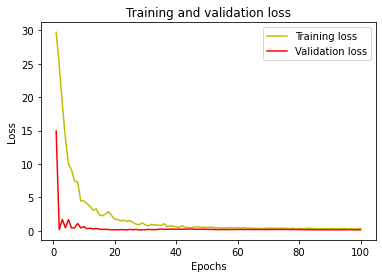

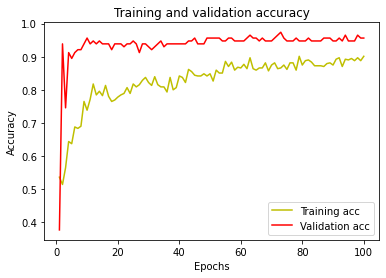

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

4/4 [==============================] - 0s 2ms/step


<AxesSubplot:>

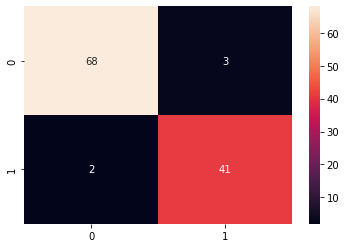

In [27]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

In [28]:
from sklearn.decomposition import PCA
import numpy as np

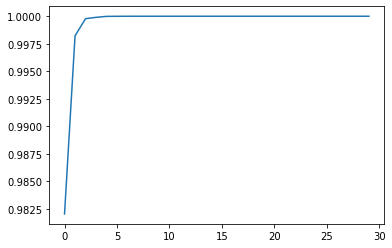

In [29]:
pca_test=PCA(n_components=30)
pca_test.fit(X)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))

In [30]:
n_PCA_components=5
pca=PCA(n_components=n_PCA_components)
principalComponents= pca.fit_transform(X)

In [31]:
df_pca= pd.DataFrame(data= principalComponents,
                    columns= ["PCA1", "PCA2", "PCA3", "PCA4", "PCA5"])

In [32]:
df_pca

,PCA1,PCA2,PCA3,PCA4,PCA5
0,1160.142574,-293.917544,48.578398,-8.711975,32.000486
1,1269.122443,15.630182,-35.394534,17.861283,-4.334874
2,995.793889,39.156743,-1.709753,4.199340,-0.466529
3,-407.180803,-67.380320,8.672848,-11.759867,7.115461
4,930.341180,189.340742,1.374801,8.499183,7.613289
...,...,...,...,...,...
564,1414.126684,110.222492,40.065944,6.562240,-5.102856
565,1045.018854,77.057589,0.036669,-4.753245,-12.417863
566,314.501756,47.553525,-10.442407,-9.771881,-6.156213
567,1124.858115,34.129225,-19.742087,-23.660881,3.565133


In [33]:
print("Explained variance per principal component: {}", 1-np.sum(pca.explained_variance_ratio_))

Explained variance per principal component: {} 1.2123463687729874e-05


In [34]:
final_df= pd.concat([df_pca, df[["Label"]]], axis=1)

In [35]:
final_df

,PCA1,PCA2,PCA3,PCA4,PCA5,Label
0,1160.142574,-293.917544,48.578398,-8.711975,32.000486,M
1,1269.122443,15.630182,-35.394534,17.861283,-4.334874,M
2,995.793889,39.156743,-1.709753,4.199340,-0.466529,M
3,-407.180803,-67.380320,8.672848,-11.759867,7.115461,M
4,930.341180,189.340742,1.374801,8.499183,7.613289,M
...,...,...,...,...,...,...
564,1414.126684,110.222492,40.065944,6.562240,-5.102856,M
565,1045.018854,77.057589,0.036669,-4.753245,-12.417863,M
566,314.501756,47.553525,-10.442407,-9.771881,-6.156213,M
567,1124.858115,34.129225,-19.742087,-23.660881,3.565133,M


In [36]:
final_X= final_df.drop("Label", axis=1)

In [37]:
final_X=final_X.to_numpy()

In [38]:
final_X.shape

(569, 5)

In [39]:
y= final_df["Label"].values

In [40]:
y.shape

(569,)

In [41]:
final_Y= le.fit_transform(y)

In [42]:
final_Y.shape

(569,)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_X, final_Y, test_size=0.2, random_state=42)

In [44]:
model = Sequential()
model.add(Dense(64, input_shape=(5,), activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(1)) 
model.add(Activation('sigmoid'))  
model.compile(loss='binary_crossentropy',
              optimizer='adam',             
              metrics=['accuracy'])

In [45]:
history = model.fit(X_train, y_train ,verbose=1, epochs=100, batch_size=32,
                     validation_data=(X_test, y_test))

Epoch 1/100
15/15 [==============================] - 1s 9ms/step - loss: 8.5474 - accuracy: 0.7626 - val_loss: 1.2558 - val_accuracy: 0.9474
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 4.0119 - accuracy: 0.8615 - val_loss: 0.7505 - val_accuracy: 0.9474
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 3.4000 - accuracy: 0.8747 - val_loss: 0.8117 - val_accuracy: 0.9474
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 2.7063 - accuracy: 0.8879 - val_loss: 0.6443 - val_accuracy: 0.9474
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 2.4630 - accuracy: 0.8967 - val_loss: 0.3202 - val_accuracy: 0.9474
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 1.8670 - accuracy: 0.8835 - val_loss: 0.4465 - val_accuracy: 0.9474
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 1.9160 - accuracy: 0.8989 - val_loss: 0.5650 - val_accuracy: 0.9474
Epoch 8/100
1

Epoch 59/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2673 - accuracy: 0.9363 - val_loss: 0.0648 - val_accuracy: 0.9825
Epoch 60/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2516 - accuracy: 0.9451 - val_loss: 0.0818 - val_accuracy: 0.9737
Epoch 61/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2404 - accuracy: 0.9275 - val_loss: 0.0870 - val_accuracy: 0.9912
Epoch 62/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3968 - accuracy: 0.9231 - val_loss: 0.0783 - val_accuracy: 0.9912
Epoch 63/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2651 - accuracy: 0.9275 - val_loss: 0.0687 - val_accuracy: 0.9737
Epoch 64/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3663 - accuracy: 0.9297 - val_loss: 0.0737 - val_accuracy: 0.9825
Epoch 65/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3271 - accuracy: 0.9341 - val_loss: 0.0573 - val_accuracy: 0.9912
Epoch 

In [46]:
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

4/4 [==============================] - 0s 856us/step - loss: 0.0811 - accuracy: 0.9825
Accuracy =  98.24561476707458 %


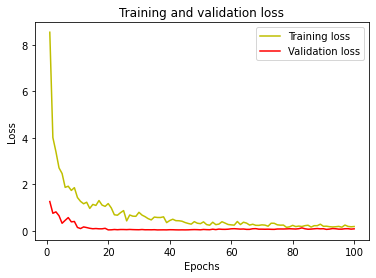

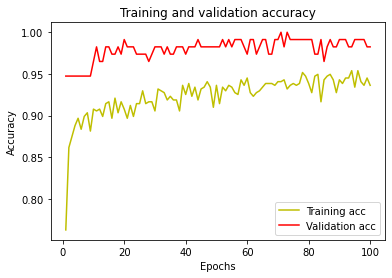

In [47]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

4/4 [==============================] - 0s 1ms/step


<AxesSubplot:>

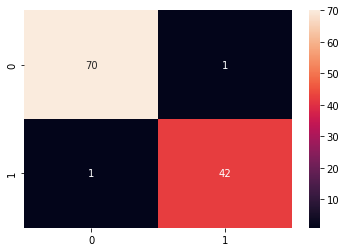

In [48]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

In [49]:
####Let's do the same but we first scale the input data

In [50]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [51]:
X_scaled = scaler.fit_transform(X)

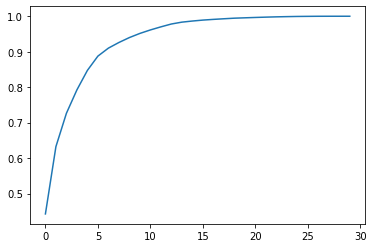

In [52]:
pca_test.fit(X_scaled)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))

In [53]:
n_PCA_components=5
pca=PCA(n_components=n_PCA_components)
principalComponents= pca.fit_transform(X_scaled)

In [54]:
df_pca= pd.DataFrame(data= principalComponents,
                    columns= ["PCA1", "PCA2", "PCA3", "PCA4", "PCA5"])

In [55]:
df_pca

,PCA1,PCA2,PCA3,PCA4,PCA5
0,9.192837,1.948583,-1.123164,3.633727,-1.195122
1,2.387802,-3.768172,-0.529293,1.118266,0.621780
2,5.733896,-1.075174,-0.551748,0.912084,-0.177080
3,7.122953,10.275589,-3.232789,0.152547,-2.960881
4,3.935302,-1.948072,1.389766,2.940642,0.546755
...,...,...,...,...,...
564,6.439315,-3.576818,2.459485,1.177318,-0.074813
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723
566,1.256179,-1.902297,0.562730,-2.089226,1.809994
567,10.374794,1.672010,-1.877030,-2.356030,-0.033737


In [56]:
final_df= pd.concat([df_pca, df[["Label"]]], axis=1)

In [57]:
final_df

,PCA1,PCA2,PCA3,PCA4,PCA5,Label
0,9.192837,1.948583,-1.123164,3.633727,-1.195122,M
1,2.387802,-3.768172,-0.529293,1.118266,0.621780,M
2,5.733896,-1.075174,-0.551748,0.912084,-0.177080,M
3,7.122953,10.275589,-3.232789,0.152547,-2.960881,M
4,3.935302,-1.948072,1.389766,2.940642,0.546755,M
...,...,...,...,...,...,...
564,6.439315,-3.576818,2.459485,1.177318,-0.074813,M
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,M
566,1.256179,-1.902297,0.562730,-2.089226,1.809994,M
567,10.374794,1.672010,-1.877030,-2.356030,-0.033737,M


In [58]:
final_X= final_df.drop("Label", axis=1)

In [59]:
final_X=final_X.to_numpy()

In [60]:
y= final_df["Label"].values
final_Y= le.fit_transform(y)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_X, final_Y, test_size=0.2, random_state=42)

In [62]:
model = Sequential()
model.add(Dense(64, input_shape=(5,), activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(1)) 
model.add(Activation('sigmoid'))  
model.compile(loss='binary_crossentropy',
              optimizer='adam',             
              metrics=['accuracy'])

In [63]:
history = model.fit(X_train, y_train ,verbose=1, epochs=100, batch_size=32,
                     validation_data=(X_test, y_test))

Epoch 1/100
15/15 [==============================] - 1s 9ms/step - loss: 0.5645 - accuracy: 0.7407 - val_loss: 0.3570 - val_accuracy: 0.9474
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.9099 - val_loss: 0.2262 - val_accuracy: 0.9561
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2312 - accuracy: 0.9429 - val_loss: 0.1583 - val_accuracy: 0.9561
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1783 - accuracy: 0.9473 - val_loss: 0.1217 - val_accuracy: 0.9649
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1471 - accuracy: 0.9626 - val_loss: 0.1007 - val_accuracy: 0.9737
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1348 - accuracy: 0.9626 - val_loss: 0.0874 - val_accuracy: 0.9737
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1107 - accuracy: 0.9626 - val_loss: 0.0788 - val_accuracy: 0.9737
Epoch 8/100
1

Epoch 59/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0446 - accuracy: 0.9846 - val_loss: 0.1179 - val_accuracy: 0.9649
Epoch 60/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0387 - accuracy: 0.9912 - val_loss: 0.1201 - val_accuracy: 0.9649
Epoch 61/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0450 - accuracy: 0.9890 - val_loss: 0.1235 - val_accuracy: 0.9649
Epoch 62/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0368 - accuracy: 0.9846 - val_loss: 0.1206 - val_accuracy: 0.9649
Epoch 63/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0460 - accuracy: 0.9824 - val_loss: 0.1171 - val_accuracy: 0.9649
Epoch 64/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0417 - accuracy: 0.9868 - val_loss: 0.1218 - val_accuracy: 0.9649
Epoch 65/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0377 - accuracy: 0.9868 - val_loss: 0.1218 - val_accuracy: 0.9649
Epoch 

In [64]:
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

4/4 [==============================] - 0s 1ms/step - loss: 0.1482 - accuracy: 0.9649
Accuracy =  96.49122953414917 %


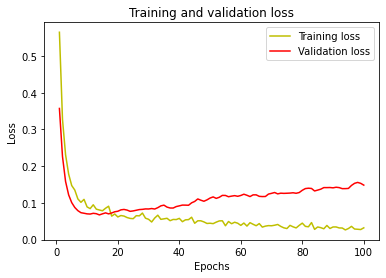

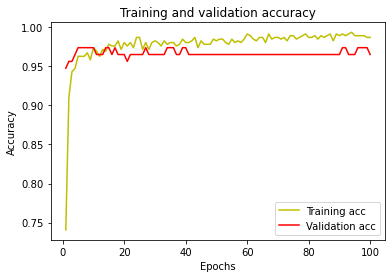

In [65]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [66]:
###overfitting

4/4 [==============================] - 0s 1ms/step


<AxesSubplot:>

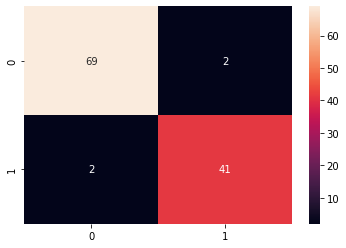

In [67]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

In [68]:
X=X.to_numpy()


In [69]:
final_Y.shape

(569,)

In [70]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, final_Y, test_size=0.2, random_state=42)

In [79]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10, random_state = 42)

model.fit(X_train, y_train) #For sklearn no one hot encoding


RandomForestClassifier(n_estimators=10, random_state=42)

Accuracy =  95.6140350877193 %


<AxesSubplot:>

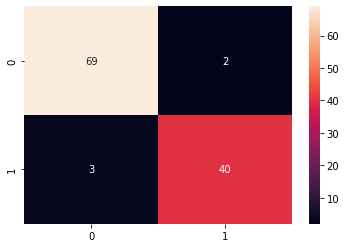

In [80]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

#Evaluate the classifier on test data
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)


print("Accuracy = ", (accuracy * 100.0), "%")

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

In [81]:
import xgboost as xgb
model = xgb.XGBClassifier()

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

Accuracy =  95.6140350877193 %


<AxesSubplot:>

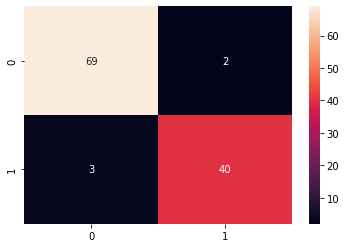

In [82]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

#Evaluate the classifier on test data
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)


print("Accuracy = ", (accuracy * 100.0), "%")

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)